In [1]:
import numpy as np
import pandas as pd
import os
print (os.getcwd())
os.chdir("C://Vishnu Murthy Chakka/Knowledge Base/Data Science/Manuals/Clustering")
print (os.getcwd())

C:\Users\Vishnu Murthy Chakka
C:\Vishnu Murthy Chakka\Knowledge Base\Data Science\Manuals\Clustering


In [2]:
dtypes = {'volume_id':np.uint8,
          'layer_id':np.uint8,
          'module_id':np.uint8,
          'cx':np.float64,
          'cy':np.float64,
          'cz':np.float64}
Detector = pd.read_csv('DBSCAN.csv',dtype=dtypes)
Detector.describe()

,volume_id,layer_id,module_id,cx,cy,cz
count,18728.000000,18728.000000,18728.000000,1.872800e+04,1.872800e+04,18728.000000
mean,13.402179,5.398761,108.851773,-3.035210e-17,1.312728e-16,0.000000
std,3.364657,2.865323,71.480521,4.637194e+02,4.637194e+02,1050.729994
min,7.000000,2.000000,0.000000,-1.021280e+03,-1.021280e+03,-2955.500000
25%,12.000000,4.000000,48.000000,-2.994700e+02,-2.948250e+02,-618.000000
50%,13.000000,4.000000,97.000000,3.050000e-14,0.000000e+00,0.000000
75%,17.000000,8.000000,165.000000,2.994700e+02,2.948250e+02,618.000000
max,18.000000,14.000000,255.000000,1.021280e+03,1.021280e+03,2955.500000


In [60]:
# extract subset where volume id = 7 and layer = 2
detector1 = Detector[(Detector.volume_id == 7) & (Detector.layer_id == 2)]
print(detector1.describe())
detector1 = detector1[['cx','cy']]
print(detector1.describe())

       volume_id  layer_id  module_id            cx            cy           cz
count      108.0     108.0  108.00000  1.080000e+02  1.080000e+02   108.000000
mean         7.0       2.0   54.50000 -2.368476e-15 -3.445803e-15 -1500.000000
std          0.0       0.0   31.32092  8.391803e+01  8.391803e+01     2.111384
min          7.0       2.0    1.00000 -1.398510e+02 -1.398510e+02 -1502.500000
25%          7.0       2.0   27.75000 -6.417640e+01 -6.417640e+01 -1502.000000
50%          7.0       2.0   54.50000  0.000000e+00  0.000000e+00 -1500.000000
75%          7.0       2.0   81.25000  6.417640e+01  6.417640e+01 -1498.000000
max          7.0       2.0  108.00000  1.398510e+02  1.398510e+02 -1497.500000
                 cx            cy
count  1.080000e+02  1.080000e+02
mean  -2.368476e-15 -3.445803e-15
std    8.391803e+01  8.391803e+01
min   -1.398510e+02 -1.398510e+02
25%   -6.417640e+01 -6.417640e+01
50%    0.000000e+00  0.000000e+00
75%    6.417640e+01  6.417640e+01
max    1.398510e+

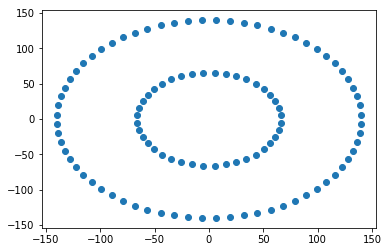

In [4]:
from matplotlib import pyplot as plt
plt.scatter(detector1.cx,detector1.cy,marker = 'o')
plt.show()

In [20]:
# perform clustering with KNN
from sklearn.cluster import KMeans
KMN = KMeans(n_clusters = 2)
KMN.fit_transform(detector1)

array([[  48.89599401,  128.86864224],
       [  96.14586593,  200.60444581],
       [ 102.41030426,  197.47868707],
       [  58.78976513,  124.6664224 ],
       [ 108.87375998,  193.99042638],
       [  68.34068419,  119.69751465],
       [ 115.45146113,  190.14903785],
       [ 122.0738958 ,  185.96730628],
       [  77.48266391,  113.99299937],
       [ 128.68159219,  181.45779497],
       [ 135.22482571,  176.63625692],
       [  86.1554205 ,  107.58813361],
       [ 141.66007944,  171.51822267],
       [  94.30306493,  100.5231064 ],
       [ 147.95013677,  166.12246901],
       [ 154.06299482,  160.47016059],
       [ 101.87403188,   92.84206343],
       [ 159.96908852,  154.58334795],
       [ 165.64236967,  148.4873358 ],
       [ 108.82045862,   84.59345079],
       [ 171.0609468 ,  142.21120744],
       [ 176.20336969,  135.78685129],
       [ 115.09911576,   75.82972313],
       [ 181.05191699,  129.25163245],
       [ 120.67064683,   66.60735828],
       [ 185.58905137,  1

In [21]:
KMN.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
detector2 = detector1
detector2['cluster'] = KMN.labels_
detector2.describe()

,cx,cy,cluster
count,1.080000e+02,1.080000e+02,108.000000
mean,-2.368476e-15,-3.445803e-15,0.500000
std,8.391803e+01,8.391803e+01,0.502331
min,-1.398510e+02,-1.398510e+02,0.000000
25%,-6.417640e+01,-6.417640e+01,0.000000
50%,0.000000e+00,0.000000e+00,0.500000
75%,6.417640e+01,6.417640e+01,1.000000
max,1.398510e+02,1.398510e+02,1.000000


In [23]:
centers = KMN.cluster_centers_
print(centers)
centerx = np.array([centers[0,0],centers[1,0]])
centery = np.array([centers[0,1],centers[1,1]])
print(centerx)
print(centery)

[[-57.40085556  42.98637778   0.2962963 ]
 [ 57.40085556 -42.98637778   0.7037037 ]]
[-57.40085556  57.40085556]
[ 42.98637778 -42.98637778]


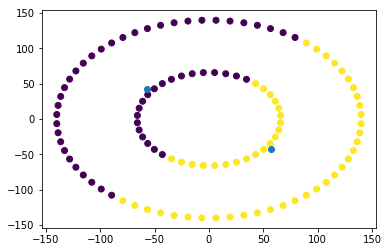

In [24]:
plt.scatter(detector2.cx,detector2.cy,c = detector1.cluster)
plt.scatter(centerx,centery)
plt.show()

In [47]:
# transform the data - get the absolute value of 'cx' and cy' and try the KMeans
detector3 = detector1
detector3.cx = np.abs(detector3.cx)
detector3.cy = np.abs(detector3.cy)
detector3.describe()

,cx,cy
count,108.000000,108.000000
mean,71.714625,71.714625
std,43.025379,43.025379
min,5.178300,5.178300
25%,34.484900,34.484900
50%,64.176400,64.176400
75%,115.500000,115.500000
max,139.851000,139.851000


In [48]:
KMN2 = KMeans(n_clusters = 2)
KMN2.fit_transform(detector3)
detector4 = detector3
detector4['cluster'] = KMN2.labels_
detector4.describe()

,cx,cy,cluster
count,108.000000,108.000000,108.000000
mean,71.714625,71.714625,0.481481
std,43.025379,43.025379,0.501986
min,5.178300,5.178300,0.000000
25%,34.484900,34.484900,0.000000
50%,64.176400,64.176400,0.000000
75%,115.500000,115.500000,1.000000
max,139.851000,139.851000,1.000000


[[ 101.25149286   44.12634857]
 [  39.90569077  101.42507692]]
[ 101.25149286   39.90569077]
[  44.12634857  101.42507692]


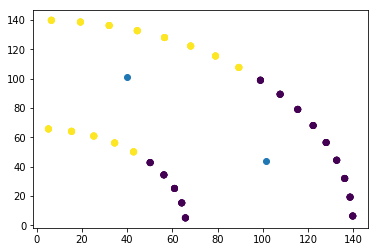

In [49]:
centers = KMN2.cluster_centers_
print(centers)
centerx = np.array([centers[0,0],centers[1,0]])
centery = np.array([centers[0,1],centers[1,1]])
print(centerx)
print(centery)
plt.scatter(detector4.cx,detector4.cy,c = detector4.cluster)
plt.scatter(centerx,centery)
plt.show()

In [53]:
# sqaure the cx & cy variable and try KMeans
detector5 = detector1
detector5.cx = np.square(detector5.cx)
detector5.cy = np.square(detector5.cy)
detector5.describe()

,cx,cy
count,108.000000,108.000000
mean,6977.030080,6977.030080
std,6714.013998,6714.013998
min,26.814791,26.814791
25%,1189.208328,1189.208328
50%,4118.610317,4118.610317
75%,13340.250000,13340.250000
max,19558.302201,19558.302201


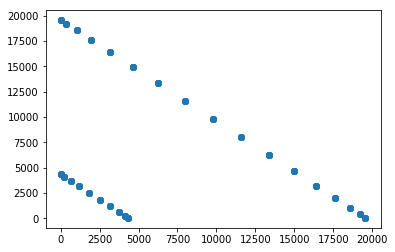

In [55]:
plt.scatter(detector5.cx,detector5.cy,marker = 'o')
plt.show()

In [56]:
KMN3 = KMeans(n_clusters = 2)
KMN3.fit_transform(detector5)
detector6 = detector5
detector6['cluster'] = KMN3.labels_
detector6.describe()

,cx,cy,cluster
count,108.000000,108.000000,108.000000
mean,6977.030080,6977.030080,0.296296
std,6714.013998,6714.013998,0.458752
min,26.814791,26.814791,0.000000
25%,1189.208328,1189.208328,0.000000
50%,4118.610317,4118.610317,0.000000
75%,13340.250000,13340.250000,1.000000
max,19558.302201,19558.302201,1.000000


[[  8571.5384831    3005.29292915]
 [  3190.07262361  16409.90581425]]
[ 8571.5384831   3190.07262361]
[  3005.29292915  16409.90581425]


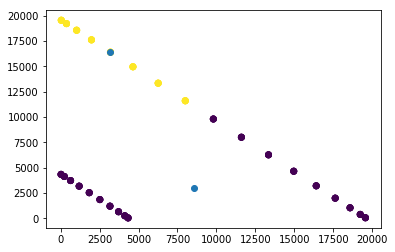

In [57]:
centers = KMN3.cluster_centers_
print(centers)
centerx = np.array([centers[0,0],centers[1,0]])
centery = np.array([centers[0,1],centers[1,1]])
print(centerx)
print(centery)
plt.scatter(detector6.cx,detector6.cy,c = detector6.cluster)
plt.scatter(centerx,centery)
plt.show()

In [62]:
# DBSCAN
from sklearn.cluster import DBSCAN
DBS = DBSCAN(eps=40,min_samples=10)
DBS.fit(detector1)
DBS.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1], dtype=int64)